In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Database

In [2]:
# Leemos base de datos
df = pd.read_csv('ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Creación nuevos nombres de columnas
columnas_nuevas = {
    'family_history_with_overweight': 'Familia_Sobrepeso',
    'FAVC': 'Comida_calorica',
    'CAEC': 'Entre_comidas',
    'CH2O': 'Consumo_agua',
    'SMOKE': 'Fuma',
    'CALC': 'Consumo_alcohol',
    'SCC':'Calorias_monitoreo',
    'Age': 'Edad',
    'Height': 'Altura_cm',
    'Weight': 'Peso_kg',
    'FCVC': 'Consumo_vegetales',
    'NCP': 'Numero_comidas',
    'FAF': 'Frec_Act_Fis',
    'TUE': 'Tiempo_electronicos',
    'Gender_Female': 'Gender_Femenino',
    'Gender_Male': 'Gender_Masculino',
    'MTRANS_Automobile': 'MTRANS_Automovil',
    'MTRANS_Bike': 'MTRANS_Bicicleta',
    'MTRANS_Motorbike': 'MTRANS_Motocicleta',
    'MTRANS_Public_Transportation': 'MTRANS_Transporte_Publico',
    'MTRANS_Walking': 'MTRANS_Camina',
    'NObeyesdad': 'Nivel_obesidad'
    }

In [5]:
df = df.rename(columns=columnas_nuevas)
df.columns

Index(['Gender', 'Edad', 'Altura_cm', 'Peso_kg', 'Familia_Sobrepeso',
       'Comida_calorica', 'Consumo_vegetales', 'Numero_comidas',
       'Entre_comidas', 'Fuma', 'Consumo_agua', 'Calorias_monitoreo',
       'Frec_Act_Fis', 'Tiempo_electronicos', 'Consumo_alcohol', 'MTRANS',
       'Nivel_obesidad'],
      dtype='object')

# Análisis exploratorio

In [6]:
# Datos nulos
df.isnull().sum()

Gender                 0
Edad                   0
Altura_cm              0
Peso_kg                0
Familia_Sobrepeso      0
Comida_calorica        0
Consumo_vegetales      0
Numero_comidas         0
Entre_comidas          0
Fuma                   0
Consumo_agua           0
Calorias_monitoreo     0
Frec_Act_Fis           0
Tiempo_electronicos    0
Consumo_alcohol        0
MTRANS                 0
Nivel_obesidad         0
dtype: int64

In [7]:
# Descripción de la base de datos
df.describe()

,Edad,Altura_cm,Peso_kg,Consumo_vegetales,Numero_comidas,Consumo_agua,Frec_Act_Fis,Tiempo_electronicos
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


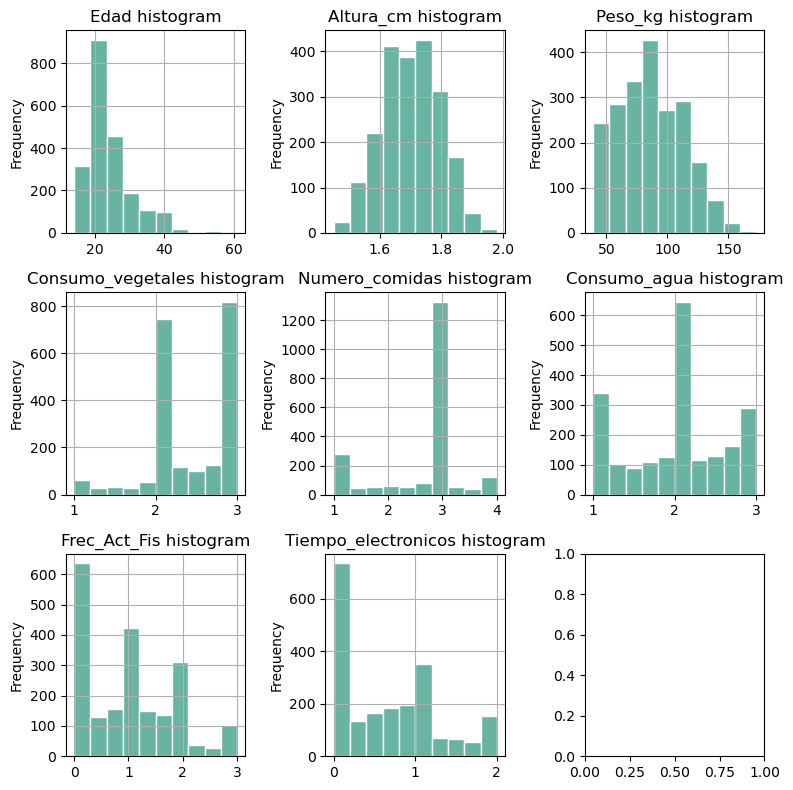

In [8]:
# Histogramas variables continuas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(df.describe().columns):
    df[column].hist(ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_title(f'{column} histogram')  
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

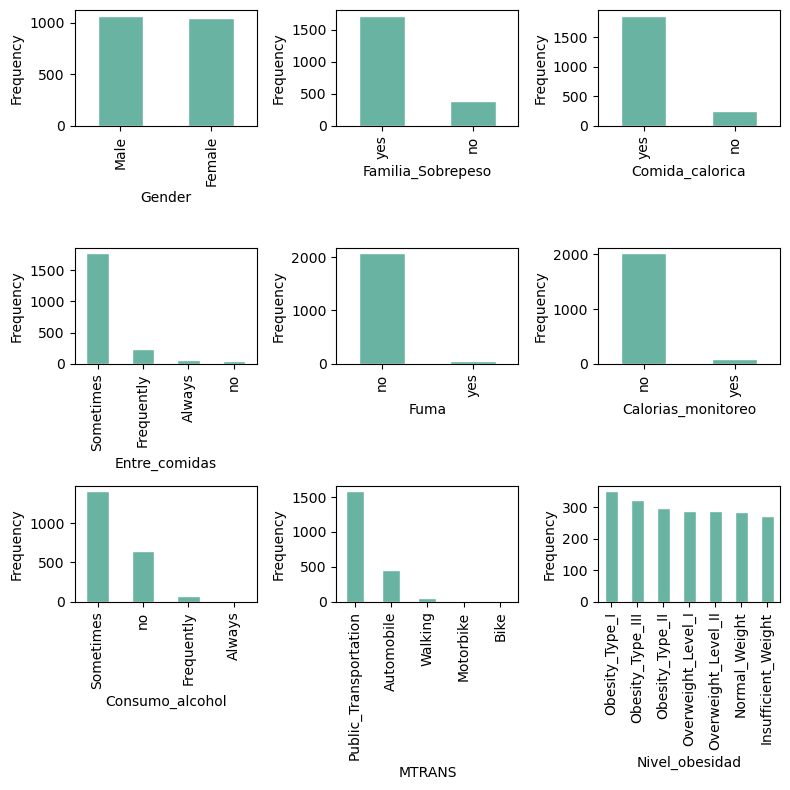

In [9]:
# Gráficas variables categóricas
categoricas = ['Gender', 'Familia_Sobrepeso', 'Comida_calorica', 'Entre_comidas', 'Fuma',
               'Calorias_monitoreo', 'Consumo_alcohol', 'MTRANS', 'Nivel_obesidad']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(categoricas):
    df[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

In [10]:
# Quitamos duplicados
df = df.drop_duplicates(ignore_index=True)

In [11]:
# Transformer
preprocessor = ColumnTransformer(
    transformers=[
        # Normalizar variables continuas
        ('continuous_scaler', MinMaxScaler(), ['Edad', 'Altura_cm', 'Peso_kg', 'Consumo_agua', 'Consumo_vegetales', 'Frec_Act_Fis', 'Tiempo_electronicos', 'Numero_comidas'])
    ]
)

In [12]:
# Aplicar transformer
df_transformed = preprocessor.fit_transform(df)

In [13]:
# Combinar
final_df = pd.DataFrame(df_transformed,
                        columns=['Edad', 'Altura_cm', 'Peso_kg', 'Consumo_agua', 'Consumo_vegetales', 'Frec_Act_Fis', 'Tiempo_electronicos', 'Numero_comidas'])

In [14]:
# Variable objetivo encoder
final_df['Nivel_obesidad'] = df['Nivel_obesidad']

In [15]:
# Descripción base de datos final
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Edad                 2087 non-null   float64
 1   Altura_cm            2087 non-null   float64
 2   Peso_kg              2087 non-null   float64
 3   Consumo_agua         2087 non-null   float64
 4   Consumo_vegetales    2087 non-null   float64
 5   Frec_Act_Fis         2087 non-null   float64
 6   Tiempo_electronicos  2087 non-null   float64
 7   Numero_comidas       2087 non-null   float64
 8   Nivel_obesidad       2087 non-null   object 
dtypes: float64(8), object(1)
memory usage: 146.9+ KB


In [16]:
final_df.describe()

,Edad,Altura_cm,Peso_kg,Consumo_agua,Consumo_vegetales,Frec_Act_Fis,Tiempo_electronicos,Numero_comidas
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,0.220279,0.476744,0.357155,0.502375,0.710733,0.337604,0.331518,0.567060
std,0.135506,0.175823,0.195454,0.304142,0.267368,0.284492,0.304077,0.254871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125871,0.339959,0.201493,0.295461,0.500000,0.041502,0.000000,0.565822
50%,0.188247,0.474687,0.329113,0.500000,0.698133,0.333333,0.315433,0.666667
75%,0.255319,0.602814,0.515044,0.733096,1.000000,0.559367,0.500000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Matriz de correlaciones
correlation_matrix = final_df.iloc[:,:-1].corr()

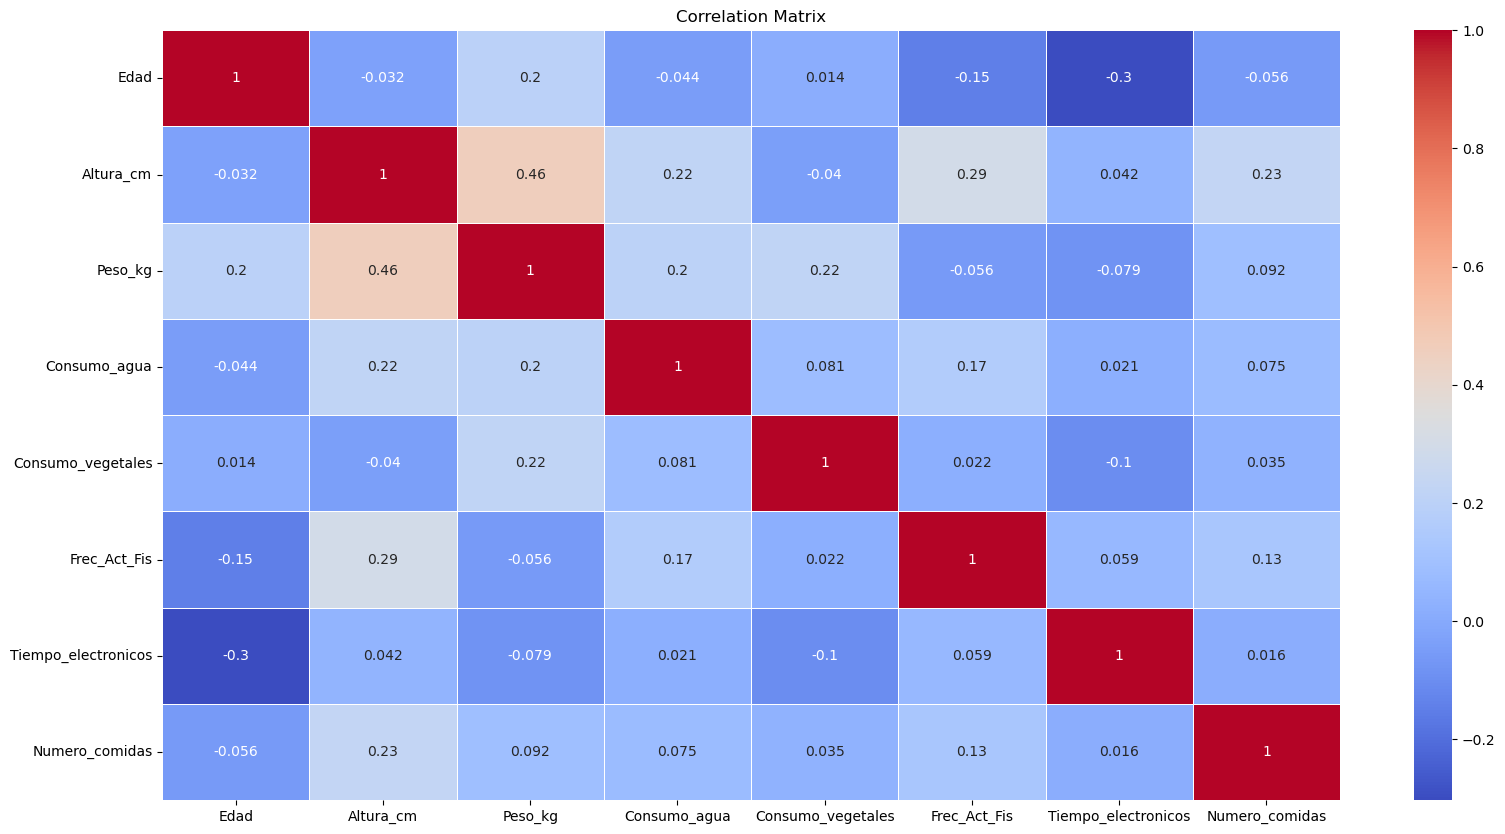

In [18]:
plt.figure(figsize=(19, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Eliminación columnas asociadas a objetivo y creación base de datos de entrenamiento
final_df.drop(columns=['Altura_cm', 'Peso_kg'], inplace=True)
train = final_df.drop(columns=['Nivel_obesidad'])
train.drop_duplicates(keep='first', inplace=True)

In [20]:
# DBSCAN MODEL
def dbscan(data, epsilon, min_points):
    # Core points
    distancias_matrix = squareform(pdist(data.values))
    data['core'] = ((distancias_matrix <= epsilon).sum(axis=1) >= min_points).astype('int')
    
    # Separating core points
    cores = data[data['core'] > 0].reset_index(drop=True).copy()
    distancias_core = squareform(pdist(cores.iloc[:,:-1].values))
    cores['cluster'] = (distancias_core[0] <= epsilon).astype('int')

    i = 1
    while min(cores['cluster'])==0:
        aux = distancias_core[cores[cores['cluster']==0].index]
        aux = aux[:, cores[cores['cluster']==i].index]
        if aux.shape[1]==0:
            cores.loc[cores[cores['cluster']==0].index[0], 'cluster'] = i
        else:
            cores.loc[cores[cores['cluster']==0].index, 'cluster'] = pd.DataFrame(((aux <= epsilon).sum(axis=1)>0).astype('int')).replace(1,i).values
            if aux.min() > epsilon:
                i += 1
                
    data = data.merge(cores, on=list(cores.columns[:-1]), how='outer').fillna(0)
    
    # Border points 
    for i in range(1,len(data.cluster.unique())):
        aux_2 = distancias_matrix[data['cluster']==0]
        aux_2 = aux_2[:, data['cluster']==i]
        data.loc[data[data['cluster']==0].index, 'cluster'] = pd.DataFrame(((aux_2 <= epsilon).sum(axis=1)>0).astype('int')).replace(1, i).values
    
    return data

In [21]:
# Grid de búsqueda para hiperparámetros
eps_values = np.arange(0.1, 1, 0.1)
min_samples = np.arange(2, 10)
DBSCAN_params = list(product(eps_values, min_samples))

In [22]:
# búsqueda de hiperparámetros evaluando el número de clusters y silueta
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = dbscan(train, epsilon=p[0], min_points=p[1])
    no_of_clusters.append(len(np.unique(DBS_clustering.cluster)))
    sil_score.append(silhouette_score(train, DBS_clustering.cluster))

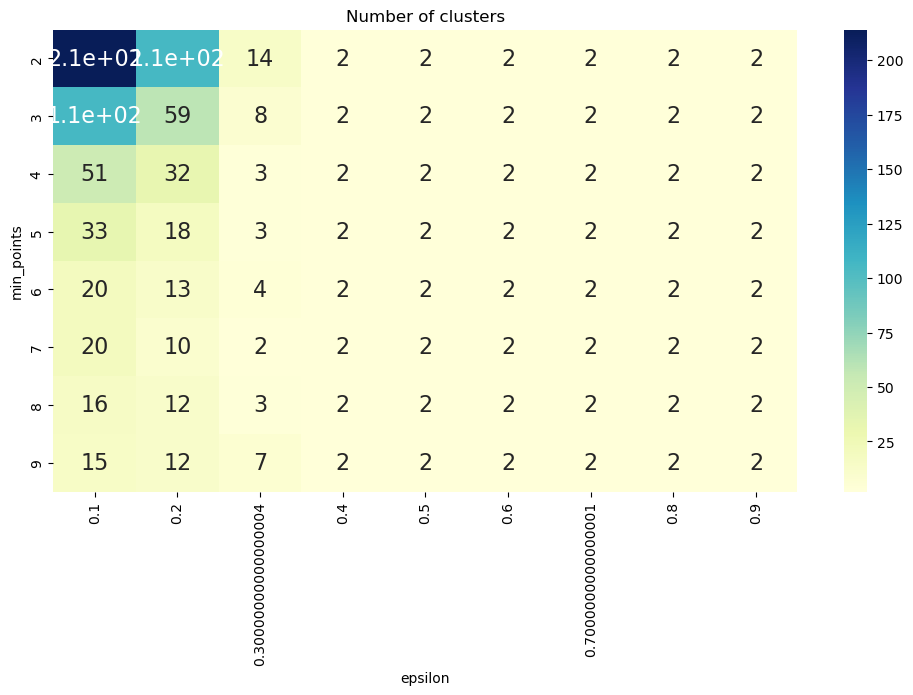

In [23]:
# Gráfico número de clusters
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['epsilon', 'min_points'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='min_points', columns='epsilon')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

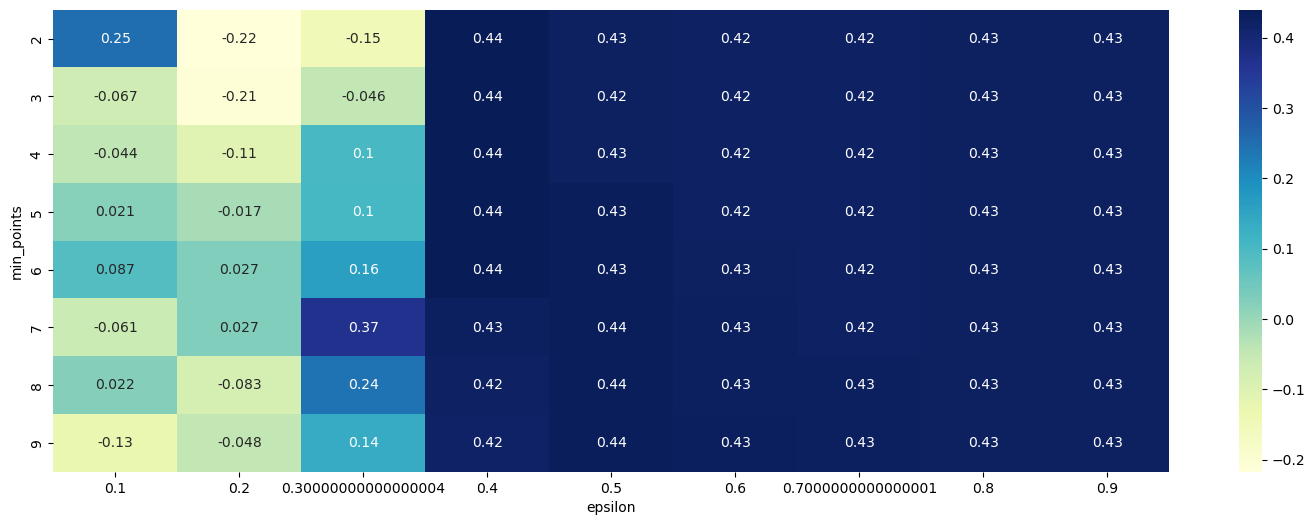

In [24]:
# Gráfico silueta
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['epsilon', 'min_points'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='min_points', columns='epsilon')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [25]:
# Entreno dbscan con hiperparámetros óptimos
result = dbscan(train, epsilon=0.4, min_points=6)

In [26]:
# Número de personas en cada cluster
result.cluster.value_counts()

cluster
1.0    1987
0.0      14
Name: count, dtype: int64

In [27]:
# Merge resultados con base de datos
data = final_df.merge(result, on=['Edad', 'Consumo_agua', 'Consumo_vegetales', 'Frec_Act_Fis',
                                  'Tiempo_electronicos', 'Numero_comidas'], how='inner')

In [28]:
df['cluster'] = data['cluster']

## Cluster 0

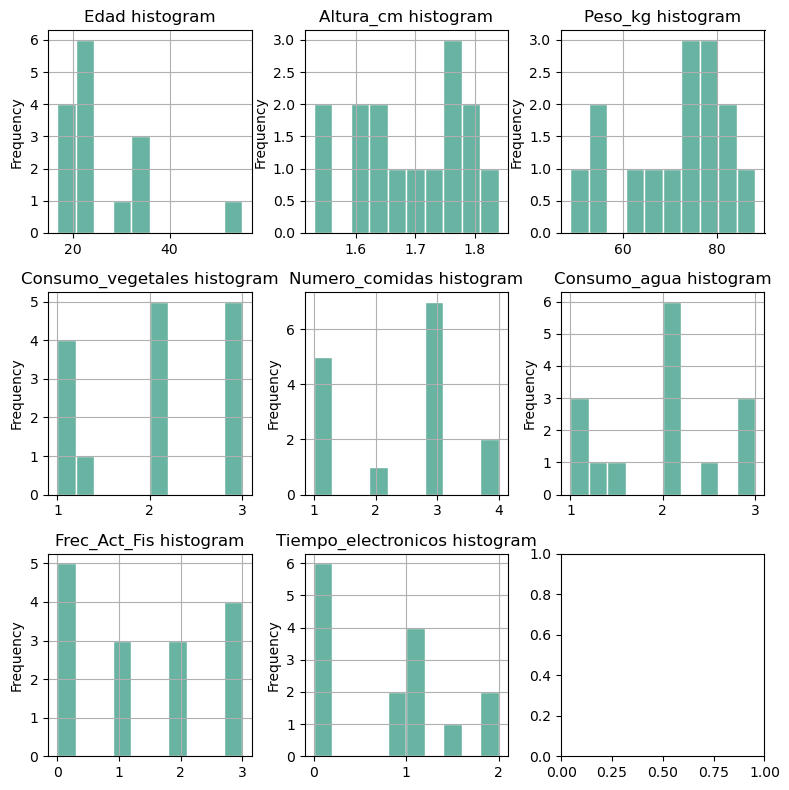

In [29]:
# Gráficas de variables continuas para cluster
cluster_cero = df[df['cluster']==0]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(cluster_cero.describe().columns[:-1]):
    cluster_cero[column].hist(ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_title(f'{column} histogram')  
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

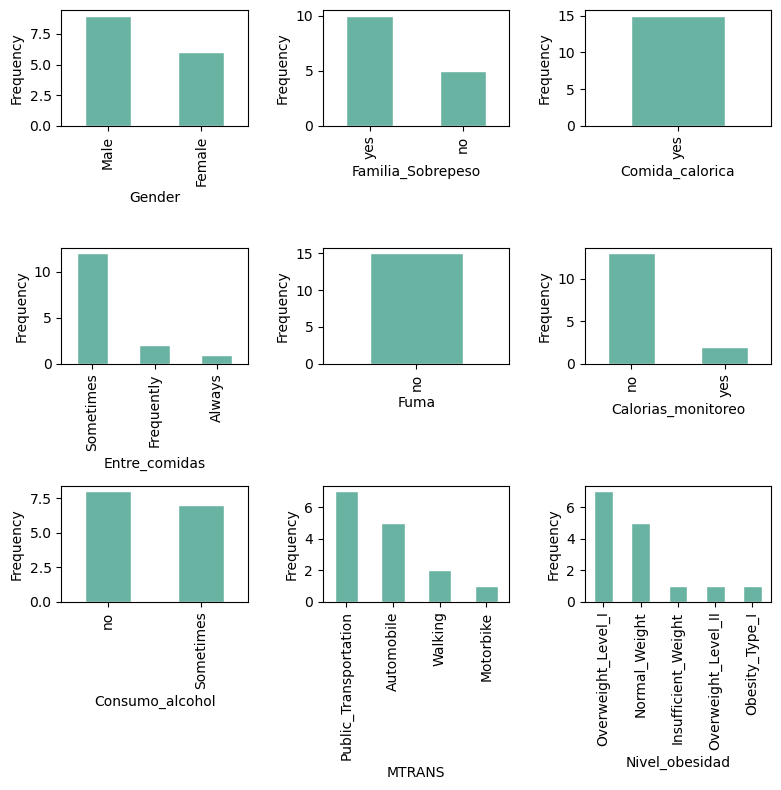

In [30]:
# Gráficas de variables categóricas para cluster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(categoricas):
    cluster_cero[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='white', color='#69b3a2') 
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

## Cluster 1

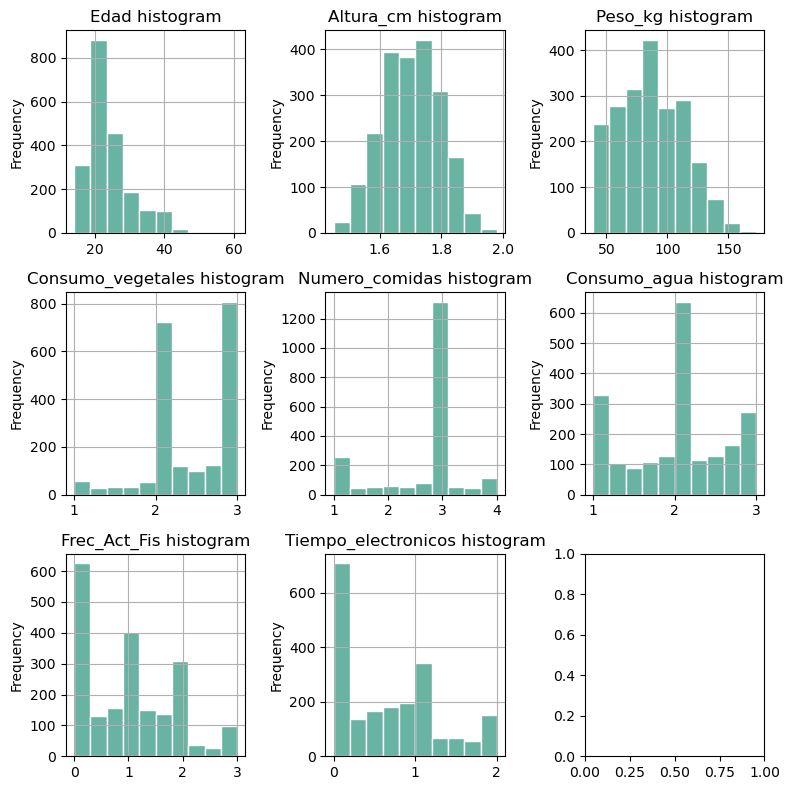

In [31]:
# Gráficas de variables continuas para cluster
cluster_one = df[df['cluster']==1]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(cluster_cero.describe().columns[:-1]):
    cluster_one[column].hist(ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_title(f'{column} histogram')  
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

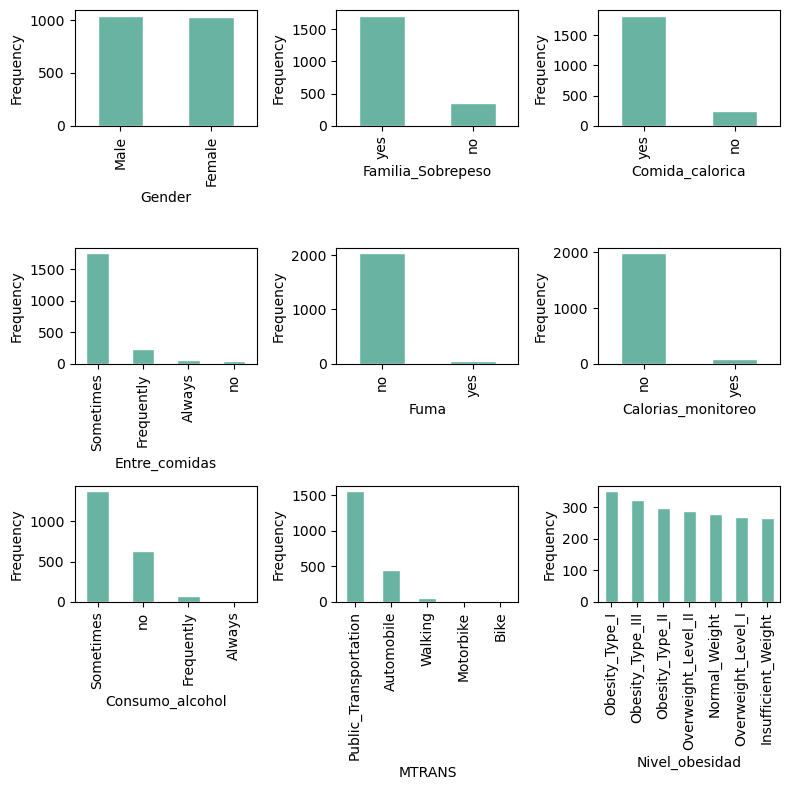

In [32]:
# Gráficas de variables categóricas para cluster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(categoricas):
    cluster_one[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

# Kmeans

In [256]:
# Importamos el modelo
from sklearn.cluster import KMeans

In [265]:
# Entrenamos el modelo
km = KMeans(n_clusters=2).fit(train)
cluster_km = km.labels_

C:\Users\danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [266]:
# Conteo de gente dentro de cada cluster
pd.DataFrame(cluster_db).value_counts()

0    1644
1     357
Name: count, dtype: int64

In [267]:
train['cluster_km'] = cluster_km

In [269]:
# Merge resultados con base de datos
data = final_df.merge(train, on=['Edad', 'Consumo_agua', 'Consumo_vegetales', 'Frec_Act_Fis',
                                  'Tiempo_electronicos', 'Numero_comidas'], how='inner')

In [271]:
df['cluster_km'] = data['cluster_km']

## Cluster 0

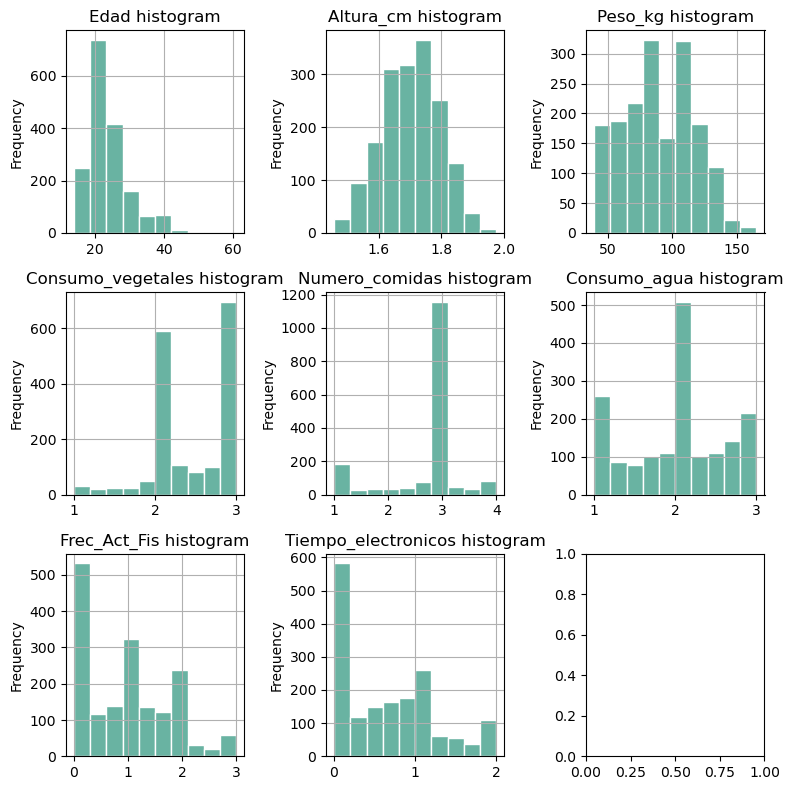

In [274]:
# Gráficas de variables continuas para cluster
cluster_cero_km = df[df['cluster_km']==0]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(cluster_cero.describe().columns[:-1]):
    cluster_cero_km[column].hist(ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_title(f'{column} histogram')  
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

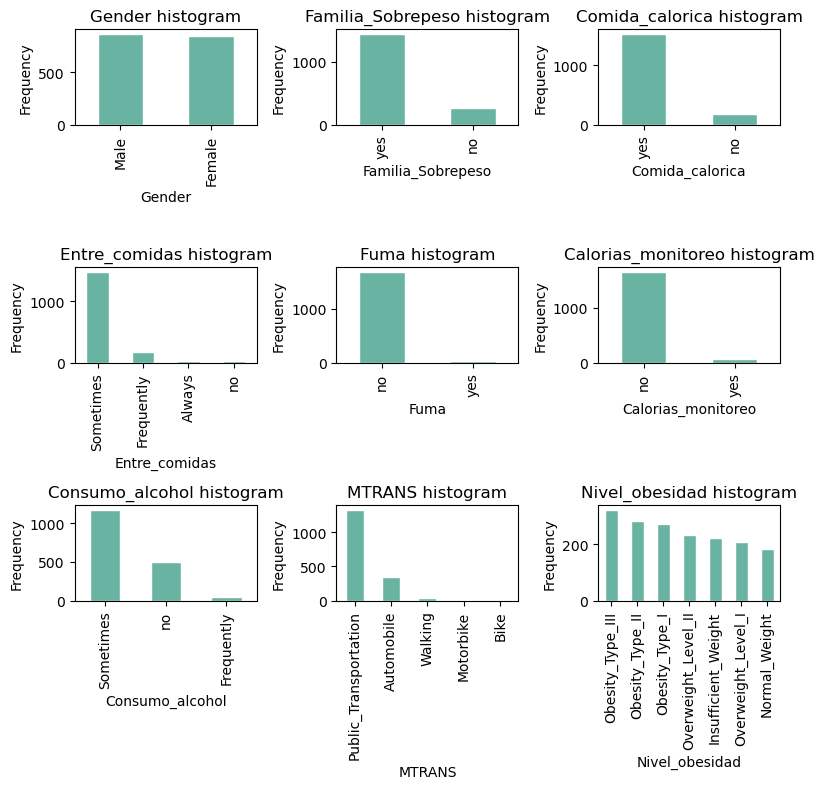

In [275]:
# Gráficas de variables categóricas para cluster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(categoricas):
    cluster_cero_km[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='white', color='#69b3a2') 
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

## Cluster 1

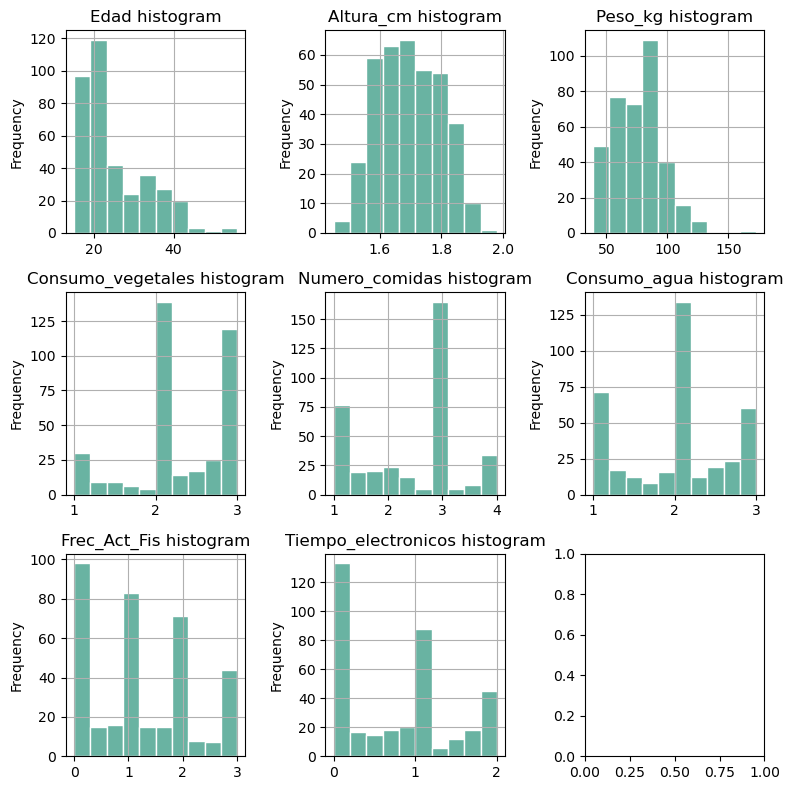

In [277]:
# Gráficas de variables continuas para cluster
cluster_one_km = df[df['cluster_km']==1]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(cluster_cero.describe().columns[:-1]):
    cluster_one_km[column].hist(ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_title(f'{column} histogram')  
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

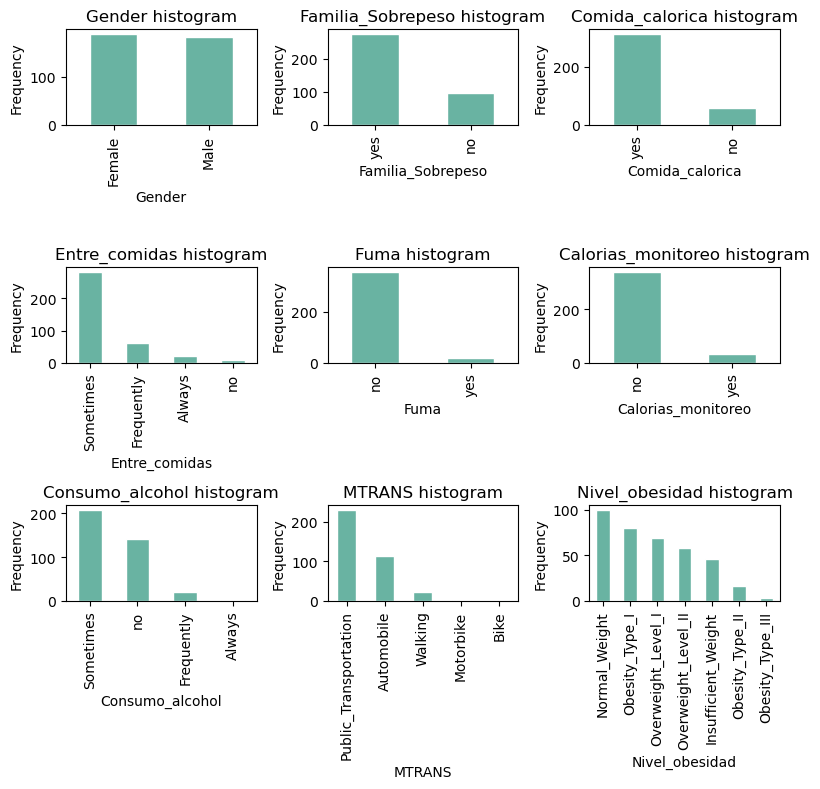

In [278]:
# Gráficas de variables categóricas para cluster
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.flatten()
for i, column in enumerate(categoricas):
    cluster_one_km[column].value_counts().plot(kind='bar', ax=axes[i], edgecolor='white', color='#69b3a2')
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()